In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import urllib2
import warnings
warnings.filterwarnings('ignore')
sns.set(context='paper')
%matplotlib inline

In [2]:
response = urllib2.urlopen('http://www.stat.ufl.edu/~winner/data/lsd.txt')
html = response.read()
print html

Dataset:  lsd.dat
Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance
Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in
Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.

Description: Group of volunteers was given LSD, their mean scores on
math exam and tissue concentrations of LSD were obtained at n=7 time points.

Variables/Columns

Tissue Concentration    1-4
Math Score             8-12



In [3]:
data = urllib2.urlopen('http://www.stat.ufl.edu/~winner/data/lsd.dat').read()
data_rows = [[float(x) for x in line.split()] for line in data.split('\n')[:-1]]
df = pd.DataFrame(data_rows, columns=['tissue_concentration', 'math_score'])

In [4]:
df

,tissue_concentration,math_score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6.00,32.92
6,6.41,29.97


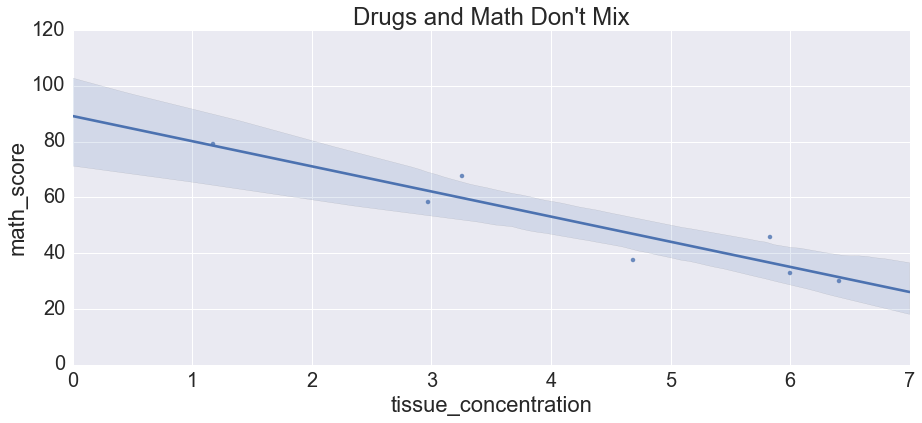

In [21]:
plt.figure(figsize=(15, 6))
sns.set(font_scale=2)
ax = plt.axes()
sns.regplot(x='tissue_concentration', y='math_score', data=df, ax=ax)
ax.set_title("Drugs and Math Don't Mix")
plt.show()

In [6]:
from sklearn import linear_model

In [7]:
regr1 = linear_model.LinearRegression()
regr1.fit(df.tissue_concentration.reshape(-1,1), df.math_score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

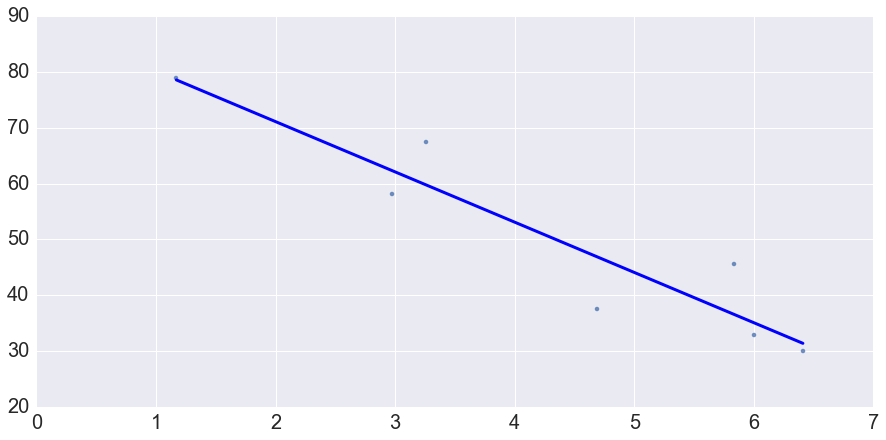

In [16]:
plt.figure(figsize=(15, 7))
sns.set(font_scale=2)
sns.regplot(df.tissue_concentration.values, df.math_score.values, fit_reg=False,  ax=plt)
plt.plot(df.tissue_concentration, regr1.predict(df.tissue_concentration.reshape(-1,1)), color='blue',
         linewidth=3)
plt.show()

In [9]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [10]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [11]:
regr2 = linear_model.LinearRegression()
regr2.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print 'Coefficients: \n', regr2.coef_
print("Mean squared error: %.2f"
      % np.mean((regr2.predict(diabetes_X_test) - diabetes_y_test) ** 2))
print('Variance score: %.2f' % regr2.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
[ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


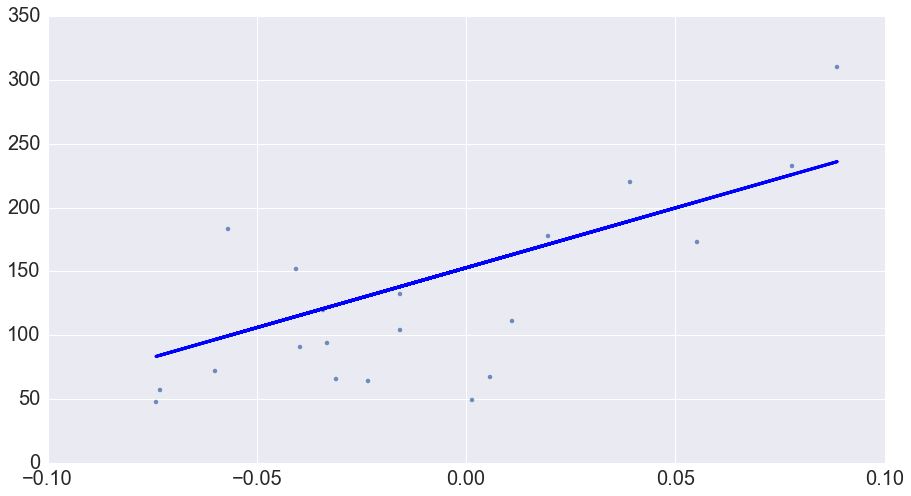

In [14]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2)

sns.regplot(diabetes_X_test, diabetes_y_test, fit_reg=False,  ax=plt)
plt.plot(diabetes_X_test, regr2.predict(diabetes_X_test), color='blue',
         linewidth=3)
plt.show()